In [6]:
!pip install tensorflow opencv-python matplotlib

In [7]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.8.2
cachetools                   5.5.2
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
comtypes                     1.4.7
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
defusedxml                 

In [16]:
!pip install Pillow

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [6]:
cpus = tf.config.experimental.list_physical_devices('CPU')
len(cpus)

1

In [7]:
import cv2

In [8]:
data_dir = 'data'

In [9]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [10]:
os.listdir(os.path.join(data_dir,'happy'))

['.ipynb_checkpoints',
 '05-12-21-happy-people.jpg',
 '1000_F_368578981_Re3aWHJGbJUTX8ytC6bswKqedruOVuDn.jpg',
 '1000_F_618001200_Rs4gohOCHN8obgHmY40SGhEbhJn86o7J.jpg',
 '1000_F_874149080_IDDdl8SHIfTGp6aqEWZBnCPI1UwLU1vO.jpg',
 '10563227-happy-person.jpg',
 '12-Things-a-Happy-Person-Does-Without-Realizing-It.jpg',
 '1200px-Smiley-svg.png',
 '160-1600378_transparent-happy-person-png-happy-man-face-png.png',
 '170404-happy-workers-feature.jpg',
 '29917610-beautiful-and-happy-man-smiling-with-thumbs-up.jpg',
 '31418025-diverse-happy-people.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_498729118_RiwWjhYDF4LgfnfEL0WCh6Ls4oh0cHPV.jpg',
 '360_F_553721043_dud5E2xUoiQaOEfJ4fLGgp7ZuQ7lsWKM.jpg',
 '360_F_569818893_ph01fzGNwgIBf0pzcwyJ3IwsRzQTpmpN.jpg',
 '383627315.jpg',
 '4-things-happy-people-dont-do-cover.png',
 '4239f3d51d092f69d529f372a37b4601-1024x341.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '427394C2000

In [11]:
image_exts = ['jpeg','jpg','bmp','png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [13]:
from PIL import Image

In [14]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
      image_path = os.path.join(data_dir,image_class,image)
      try:
        img = cv2.imread(image_path)
        tip=Image.open(image_path).format.lower()
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
      except Exception as e:
        print('Issue with image {}'.format(image_path))

Issue with image data\happy\.ipynb_checkpoints
Issue with image data\sad\.ipynb_checkpoints


In [15]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [87]:
data= tf.keras.utils.image_dataset_from_directory('data',shuffle=True)

Found 215 files belonging to 2 classes.


In [88]:
data_iterator= data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

In [90]:
# this is the image
batch[0].shape

(32, 256, 256, 3)

In [91]:
#this is the label
# 0 is happy people
# 1 is sad people
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

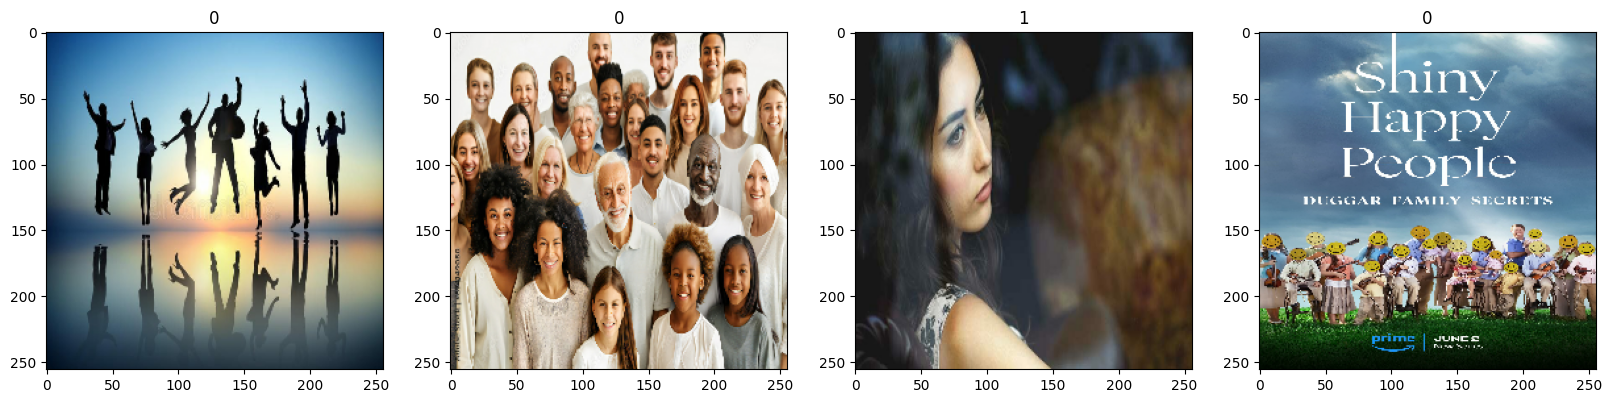

In [92]:
fig,ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [93]:
data = data.map(lambda x,y: (x/255,y))

In [94]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

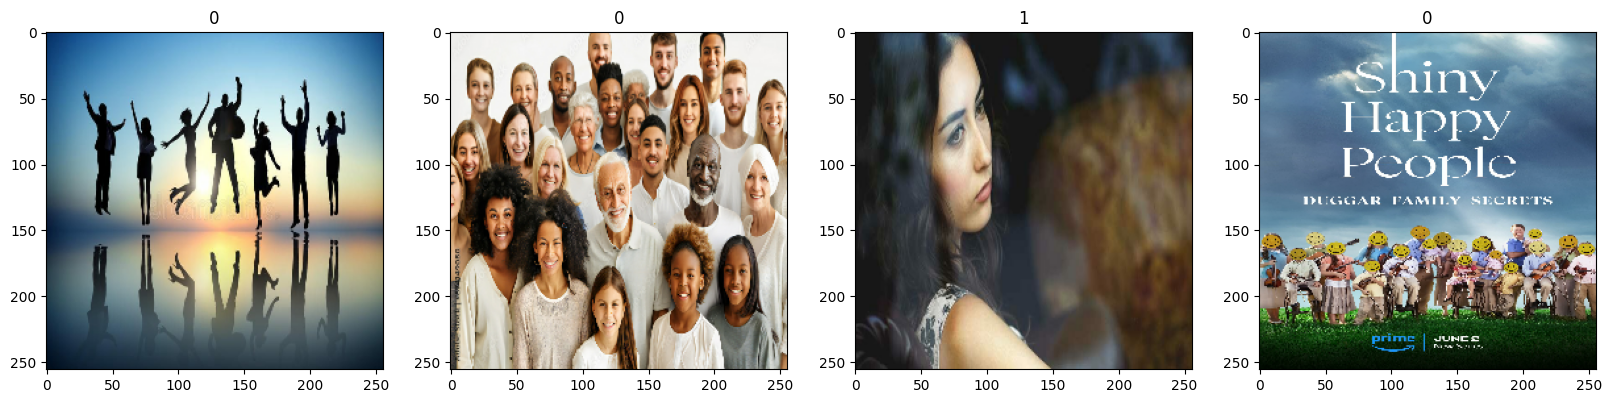

In [95]:
fig,ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [96]:
len(data)

7

In [97]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [98]:
train_size

4

In [99]:
val_size

2

In [100]:
test_size

1

In [101]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [102]:
len(train)

4

In [103]:
len(val)

2

In [104]:
len(test)

1

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [106]:
model = Sequential()

In [107]:
model.add(Conv2D(16 , (3,3) , 1 , activation= 'relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3) , 1 , activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [108]:
model.compile('adam',loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
logdir = 'logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback] )

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5646 - loss: 0.8598 - val_accuracy: 0.5781 - val_loss: 0.6704
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6052 - loss: 0.6654 - val_accuracy: 0.5625 - val_loss: 0.6767
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6375 - loss: 0.6707 - val_accuracy: 0.6719 - val_loss: 0.6504
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8260 - loss: 0.6419 - val_accuracy: 0.5000 - val_loss: 0.6678
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6146 - loss: 0.5992 - val_accuracy: 0.7812 - val_loss: 0.5291
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7635 - loss: 0.5216 - val_accuracy: 0.7188 - val_loss: 0.5376
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8750 - loss: 0.4190 - val_accuracy: 0.6875 - val_loss: 0.5100
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7052 - loss: 0.5560 - val_accuracy: 0.9062 - val_loss: 0.3314
Epoch 9/20
4/4 

In [113]:
hist.history

{'accuracy': [0.546875,
  0.5703125,
  0.65625,
  0.828125,
  0.6328125,
  0.75,
  0.8359375,
  0.75,
  0.8984375,
  0.9375,
  0.9140625,
  0.921875,
  0.953125,
  0.953125,
  0.984375,
  0.9921875,
  0.9921875,
  0.984375,
  0.9921875,
  0.984375],
 'loss': [0.9135245084762573,
  0.6704851388931274,
  0.6697944402694702,
  0.6350780725479126,
  0.6065056324005127,
  0.5108103156089783,
  0.4260895848274231,
  0.4846336841583252,
  0.35075822472572327,
  0.30502063035964966,
  0.25526654720306396,
  0.20038768649101257,
  0.15629436075687408,
  0.15926319360733032,
  0.10668861120939255,
  0.07429239153862,
  0.12202169001102448,
  0.07287738472223282,
  0.03677559643983841,
  0.0674811601638794],
 'val_accuracy': [0.578125,
  0.5625,
  0.671875,
  0.5,
  0.78125,
  0.71875,
  0.6875,
  0.90625,
  0.953125,
  0.921875,
  0.859375,
  0.953125,
  0.875,
  0.984375,
  0.984375,
  1.0,
  1.0,
  1.0,
  0.984375,
  1.0],
 'val_loss': [0.6703786849975586,
  0.6766735315322876,
  0.65040016174

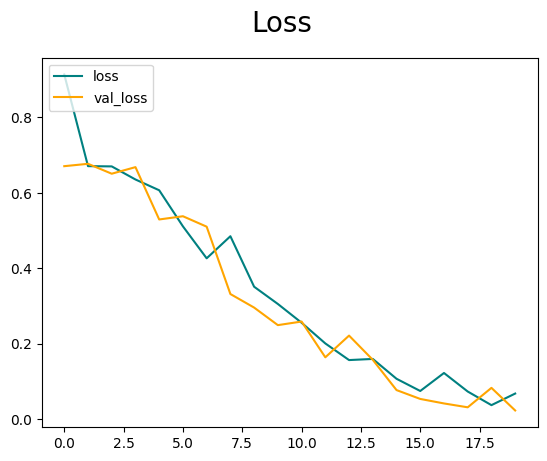

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal', label='loss')
plt.plot(hist.history['val_loss'] , color='orange' , label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

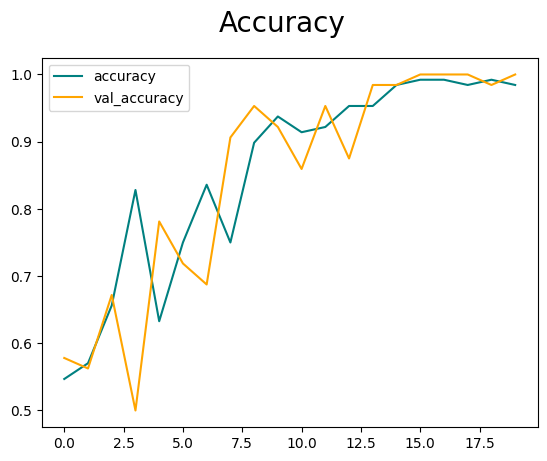

In [115]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'] , color='orange' , label= 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [50]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [116]:
pre = Precision()
re =  Recall()
acc = BinaryAccuracy()

In [117]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


In [118]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.9166666865348816, Accuracy:0.95652174949646


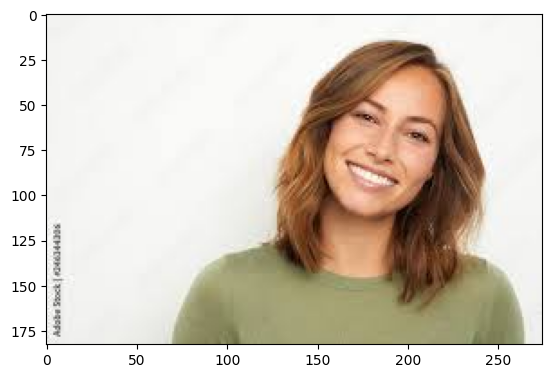

In [119]:
img = cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

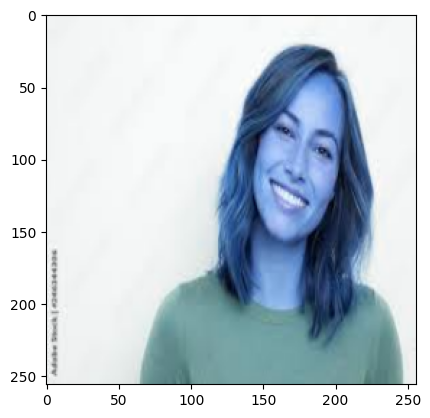

In [120]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [121]:
resize.shape

TensorShape([256, 256, 3])

In [122]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [123]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [124]:
yhat

array([[0.15174812]], dtype=float32)

In [125]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


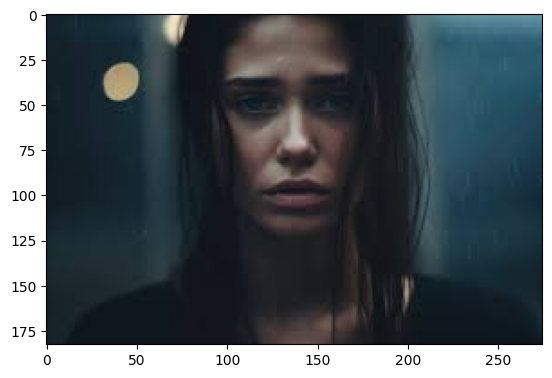

In [128]:
image = cv2.imread('sadtest.jpeg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

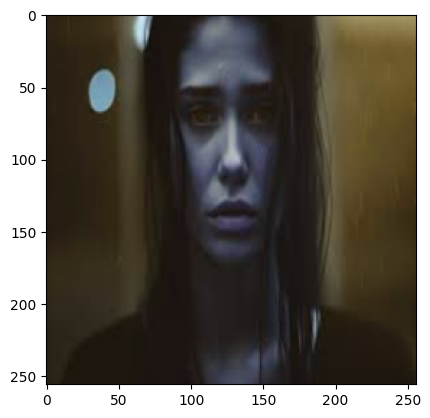

In [131]:
resize1 = tf.image.resize(image,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize1/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [135]:
yhat

array([[0.68496364]], dtype=float32)

In [136]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


In [137]:
from tensorflow.keras.models import load_model

In [139]:
model.save(os.path.join('models','happysadclassifier.keras'))

In [141]:
new_model = load_model(os.path.join('models','happysadclassifier.keras'))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [143]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


In [144]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
